In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
hourData = pd.read_csv('bike+sharing+dataset/hour.csv')

In [3]:
# Step 1: Compute correlation matrix (numeric only)
corr_matrix = hourData.corr(numeric_only=True)

# Step 2: Get correlation with target variable 'cnt'
target_corr = corr_matrix['cnt'].drop('cnt')

# Step 3: Identify columns with abs(correlation) < 0.1
low_target_corr_cols = target_corr[np.abs(target_corr) < 0.1].index.tolist()

# Step 4: Drop them from the dataset
hourData = hourData.drop(columns=low_target_corr_cols)

# Print what was removed
print("Removed columns with low correlation to 'cnt':", low_target_corr_cols)

Removed columns with low correlation to 'cnt': ['holiday', 'weekday', 'workingday', 'windspeed']


In [4]:
# Drop redundant or useless columns from the dataset
hourData = hourData.drop(columns=['atemp', 'instant'])

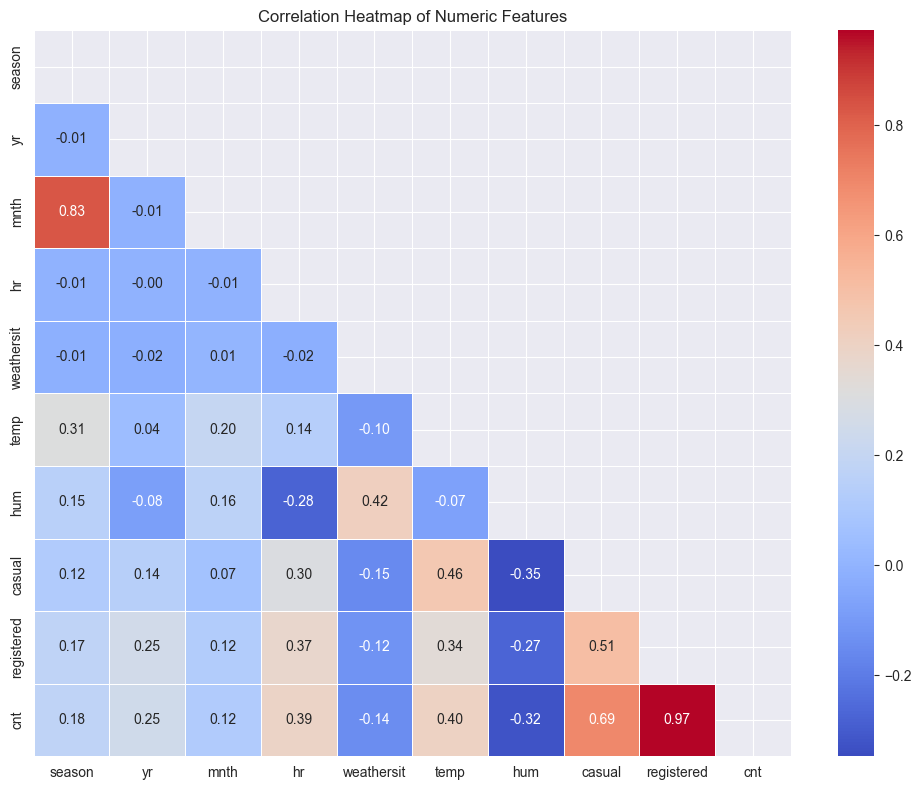

In [5]:
# Step 1: Compute the correlation matrix
correlation_matrix = hourData.corr(numeric_only=True)

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Step 2: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()